In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('food.csv')
x=data.iloc[:,1:3].values
print(x)
y=data.iloc[:,3].values
print(y)

[[10  9]
 [ 1  4]
 [10  1]
 [ 7 10]
 [ 3 10]
 [ 1  1]
 [ 2  8]
 [ 3  1]
 [ 8  5]
 [ 3  7]
 [ 1  9]
 [ 3  6]
 [ 7  3]
 [10  7]
 [ 2  3]]
['fruit' 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'vegetable'
 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'fruit' 'fruit'
 'protein']


In [12]:
le = LabelEncoder()
y_new = le.fit_transform(y)
print(y_new)

[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]


In [16]:
data.head()

Ingredient  Sweetness  Crunchiness   FoodType
0      apple         10            9      fruit
1      bacon          1            4    protein
2     banana         10            1      fruit
3     carrot          7           10  vegetable
4     celery          3           10  vegetable

In [17]:
data.tail()

Ingredient  Sweetness  Crunchiness   FoodType
10    lettuce          1            9  vegetable
11       nuts          3            6    protein
12     orange          7            3      fruit
13       pear         10            7      fruit
14     shrimp          2            3    protein

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ingredient   15 non-null     object
 1   Sweetness    15 non-null     int64 
 2   Crunchiness  15 non-null     int64 
 3   FoodType     15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=.25,random_state=1)
print(y_test)

[2 1 2 0]


[2 1 2 0]
[0 1 2 0]
[[0.6 0.  0.4]
 [0.2 0.8 0. ]
 [0.  0.4 0.6]
 [0.8 0.2 0. ]]
3
[[1 0 0]
 [0 1 0]
 [1 0 1]]


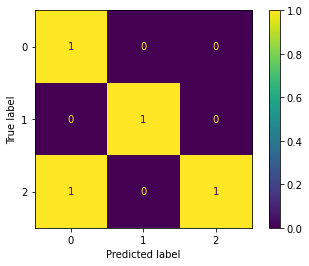

In [26]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
print(y_test)
print(y_predict)
print(knn.predict_proba(x_test))
print(accuracy_score(y_test,y_predict,normalize=False))
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()